**Example**
Inferring the probability $p$ that a coin comes up with heads.

Hypothesis $h_p$ is that the probability is $p \in [0,1]$.

In discrete case, we have 

$$
P(\mathcal{D}|h) = \left[\frac{1}{|h|}\right]^{|\mathcal{D}|}
$$

Sample probability:

$$
P(N|h_p) = {N \choose k} p^k (1-p)^{n-k}
$$

prior: $h_p$ is uniformly distributed

$$
f_p(x) = 1
$$

Posterior:

$$
P(h_p|\mathcal{D}) = \frac{P(\mathcal{D}|h_p) f_p}{\int P(\mathcal{D}|h_p) f_p\ \mathrm{d}x'}
$$

**Exercise 3.15**

$$
\mu = \frac{a}{a+b}
$$

$$
\sigma^2 = \frac{ab}{(a+b)^2 (a+b+1)}
$$

In [1]:
import sympy

In [3]:
a, b, mu, sigma = sympy.symbols("a b mu sigma")

In [26]:
amub = sympy.solve(mu - a/(a+b), a)[0]

In [6]:
eqn1 = sigma**2 - a*b/((a+b)**2*(a+b+1))

In [27]:
eqn2 = sympy.simplify(eqn1.subs(a, amub))

In [28]:
solb = sympy.solve(eqn2, b, domain=sympy.S.Reals)[0]

In [29]:
sola = ((b * mu)/(1-mu)).subs(b, solb)

In [31]:
sola.subs(mu, 0.7).subs(sigma, 0.2)

2.97500000000000

In [32]:
solb.subs(mu, 0.7).subs(sigma, 0.2)

1.27500000000000

**Future number of heads**
Given the posterior distribution $\theta \sim \mathrm{Beta}(a,b)$ what is the probability to have $x$ heads in $M$ trials?

From conjugate prior relationship we know

$$
\mathrm{Beta}(a+x, b+(M-x)) = \frac{\mathrm{Binom}(M,x|\theta) \mathrm{Beta}(\theta|a,b)}{\int \mathrm{Binom}(M,x|\theta) \mathrm{Beta}(\theta|a,b)\ \mathrm{d}\theta}
$$

$$
\begin{align}
P(X=x|M) &= \int \mathrm{Binom}(M,x|\theta) \mathrm{Beta}(\theta|a,b)\ \mathrm{d}\theta \\
         &= \frac{\mathrm{Binom}(M,x|\theta) \mathrm{Beta}(\theta|a,b)}{\mathrm{Beta}(a+x, b+(M-x))} \\
         &= {M \choose x} \frac{\theta^x (1-\theta)^{M-x} \Gamma(a+b) \theta^{a-1} (1-\theta)^{b-1} \Gamma(a+x)\Gamma(b+(M-x))}{\Gamma(a+b+M) \theta^{a+x-1}(1-\theta)^{b+M-x-1}\Gamma(a)\Gamma(b)}
\end{align}
$$

**Multinomial model**

$$
P(k_1, \ldots, k_n|m, \mathbf{\theta}) = \begin{pmatrix} m \\ k_1 \cdots k_n \end{pmatrix} \theta_1^{k_1} \cdots \theta_n^{k_n}
$$

Conjugate prior is the Dirichlet distribution:

$$
P(\theta_1, \ldots, \theta_n|\mathbf{\alpha}) = \frac{\Gamma(\alpha_1 + \cdots + \alpha_n)}{\Gamma(\alpha_1)\cdots\Gamma(\alpha_n)} \theta_1^{\alpha_1-1} \cdots \theta_n^{\alpha_n-1}
$$

We have $N$ dice rolls with $\mathcal{D}=\{x_1, \ldots, x_N\}$ where each $x_i \in \{1, \ldots, K\}$. The likelihood (sample distribution) is

$$
P(X_1=x_1, \ldots, X_n=x_n|\mathbf{\theta}) = \theta_{x_1}  \cdots \theta_{x_N}
$$

Let $N_k$ be the number of rolls where $k$ came up. This is a sufficient statistics $\mathbf{T}(\mathbf{x}) = (N_1, \ldots, N_k)^T$ since

$$
P(\mathbf{x}|\mathbf{T}(\mathbf{x})) = \theta_1^{N_1} \cdots \theta_K^{N_k} = P(\mathbf{T}(\mathbf{x})|\mathbf{\theta})
$$

Computing the maximum likelihood of Dirichlet by maximizing log-likelihood under the constraint that $\sum_i \theta_i = 1$.

The Lagrangian is then 
$$
\mathcal{L}(\mathbf{\theta}, \lambda) = (\alpha_1-1) \log \theta_1 + \cdots + (\alpha_n-1) \log \theta_n - \lambda (\theta_1 + \cdots + \theta_n - 1)
$$

$$
\partial_{\theta_i} \mathcal{L} = \frac{\alpha_i - 1}{\theta_i} - \lambda
$$

So 
$$
\lambda \theta_i = \alpha_i - 1
$$

$$
\partial_\lambda \mathcal{L} = \sum_i \theta_i - 1 = \sum_i \frac{\alpha_i - 1}{\lambda} - 1
$$

So
$$
\lambda = \sum_i (\alpha_i - 1)
$$

And then 
$$
\theta_i = \frac{\alpha_i - 1}{\sum_i (\alpha_i - 1)}
$$

1d example: coin flips with $\theta$.

1. Learning phase:
Posterior distribution for $\theta$. $\mathcal{D} = \{H,T,T,H, \ldots\}$ or, more concisely, $(N,k)$.

$$
p(\theta|\mathcal{D}) = \frac{p(\mathcal{D}|\theta) p(\theta)}{\int \cdots}
$$

where $p(\mathcal{D}|\theta)$ is Binomial distribution and $p(\theta)$ is a Beta-distribution.

2. Posterior-predictive distribution

$$
p(k|N, \mathcal{D}) = \mathrm{Binom}(N,k,\theta) p(\theta|\mathcal{D})
$$

**Naive Bayes classifier**

Data is $\mathcal{D}=\{\mathbf{x}_1, \mathbf{x}_2, \ldots\}$. Parameter for each class $c$ is $\theta_{i,c}$ where $i \in \{1, \ldots, K\}$ if each class-conditional distribution has $K$ parameters (e.g. one for each dimension in Bernoulli model, two for each dimension in Gaussian etc.)

$$
p(\mathbf{\theta}|\mathcal{D}) = \frac{p(x_1^1, x_1^2, \ldots|\mathbf{\theta}_1)p(\mathbf{\theta_1}) p(x_2^1, x_2^2, \ldots|\mathbf{\theta}_2)p(\mathbf{\theta_2}) \cdots}{\int \cdots} = \frac{p(x_1^1|\theta_1)p(x_1^2|\theta_1)\cdots p(x_2^1|\theta_2)p(x_2^2|\theta_2)\cdots}{\int \cdots} 
$$

Posterior predictive probability

$$
\begin{align}
P(y = c | \mathbf{x}, \mathcal{D}) & \propto P(\mathbf{x} | y = c, \mathcal{D}) P(y=c|\mathcal{D}) \\
& = P(y=c|\mathcal{D}) \prod_{j = 1}^D P(x_j | y=c, \mathcal{D}) \\
& =  \int P(y=c|\mathbf{\pi}) P(\mathbf{\pi}|\mathcal{D})\ \mathrm{d}\mathbf{\pi} \prod_j \int P(x_j|y=c, \mathbf{\theta}) P(\mathbf{\theta}|\mathcal{D})\ \mathrm{d}\mathbf{\theta}
\end{align}
$$

**Exercise 3.1**
Beta-binomial model with uniform prior $\alpha=\beta=1$. Derive MLE by elementary calculus.

$$
P(\theta|\mathbf{x}) \propto {N \choose k} \theta^k (1-\theta)^{N-k} = \frac{N!}{k! (N-k)!} \theta^k (1-\theta)^{N-k}
$$


$$
\begin{align}
\frac{\mathrm{d}}{\mathrm{d}\theta} P(\theta|\mathbf{x}) &= \frac{N!}{k! (N-k)!}\left[k \theta^{k-1} (1-\theta)^{N-k} - \theta^k (N-k) (1-\theta)^{N-k-1} \right] 
\end{align}
$$

$$
\begin{align}
k \theta^{k-1} (1-\theta)^{N-k} - \theta^k (N-k) (1-\theta)^{N-k-1} &= 0 \\
\theta^{k-1} (1-\theta)^{N-k-1} \left[k (1-\theta) - \theta (N-k)\right] &= 0 \\
k - \theta k - \theta N + \theta k &= 0 \\
\theta = \frac{k}{N}
\end{align}
$$

**Exercise 3.2**
$$
\begin{align}
p(D) &= \frac{\Gamma(\alpha_1 + N_1) \Gamma(\alpha_0 + N_0) \Gamma(\alpha_1 + \alpha_0)}{\Gamma(\alpha_1+\alpha_0+N)\Gamma(\alpha_1)\Gamma(\alpha_0)} \\
     &= \frac{(\alpha_1 + N_1-1)! (\alpha_0 + N_0 - 1)! (\alpha_1 + \alpha_0 - 1)!}{(\alpha_1+\alpha_0+N - 1)! (\alpha_1-1)!(\alpha_0-1)!} \\
     &= \frac{(\alpha_1 + N_1-1)!}{(\alpha_1-1)!} \frac{(\alpha_0 + N_0 - 1)!}{(\alpha_0-1)!}\frac{(\alpha_1 + \alpha_0 - 1)!}{(\alpha_1+\alpha_0+N - 1)!} \\
\end{align}
$$

**Exercise 3.3**

$$
\begin{align}
p(x|n,\mathcal{D}) &= \frac{\Gamma(x+\alpha_1')\Gamma(n-x+\alpha_0')}{\Gamma(x+\alpha_1'+n-x+\alpha_0')} \frac{\Gamma(\alpha_1'+\alpha_0')}{\Gamma(\alpha_1')\Gamma(\alpha_0')} {n \choose x}\\
&= \frac{\Gamma(x+\alpha_1')\Gamma(1-x+\alpha_0')}{\Gamma(x+\alpha_1'+1-x+\alpha_0')} \frac{\Gamma(\alpha_1'+\alpha_0')}{\Gamma(\alpha_1')\Gamma(\alpha_0')} \frac{1!}{x!(1-x)!}\\
&= \frac{(x+\alpha_1'-1)!(1-x+\alpha_0'-1)!}{(x+\alpha_1'-x+\alpha_0')!} \frac{(\alpha_1'+\alpha_0'-1)!}{(\alpha_1'-1)!(\alpha_0'-1)!} \frac{1}{x!(1-x)!}\\
&= \frac{(x+\alpha_1'-1)!(-x+\alpha_0')!}{(\alpha_1'+\alpha_0')!} \frac{(\alpha_1'+\alpha_0'-1)!}{(\alpha_1'-1)!(\alpha_0'-1)!} \frac{1}{x!(1-x)!}\\
&= \frac{(\alpha_1')!(-1+\alpha_0')!}{(\alpha_1'+\alpha_0')!} \frac{(\alpha_1'+\alpha_0'-1)!}{(\alpha_1'-1)!(\alpha_0'-1)!} \frac{1}{1!0!}\\
\end{align}
$$

**Exercise 3.4** Beta updating from censored likelihood
(Source: Gelman.) Suppose we toss a coin $n = 5$ times. Let $X$ be the number of heads. We observe that
there are fewer than 3 heads, but we don't know exactly how many. Let the prior probability of heads be
$p(\theta) = \mathrm{Beta}(\theta|l, 1)$. Compute the posterior $p(\theta|X < 3)$ up to normalization constants, i.e., derive an
expression proportional to $p(\theta, X < 3)$. Hint: the answer is a mixture distribution.

$$
p(\theta|\mathcal{D}) \propto P(\mathcal{D}|\theta) P(\theta)
$$

$$
\begin{align}
P(\theta|X<3) & \propto P(X<3|\theta)P(\theta) \\
              &= \sum_{k=0}^2 {n \choose k} \theta^k (1-\theta)^{n-k} \frac{\Gamma(l+1)}{\Gamma(l)\Gamma(1)} \theta^{l-1} (1-\theta)^0 \\
              &= \sum_{k=0}^2 \frac{l! n!}{(l-1)! k! (n-k)!} \theta^{k-l-1} (1-\theta)^{n-k}
\end{align}
$$

**Exercise 3.5**
 Let $\phi(\theta) = \log \frac{\theta}{1-\theta}$. Show that $p(\phi) = \mathrm{const} \Rightarrow p(\theta) \propto \mathrm{Beta}(\theta|0,0)$.

$$
\begin{align}
P(\phi)\ \mathrm{d}\phi &= P(\theta) |\partial_\theta \phi(\theta)|\ \mathrm{d}\theta \\
                        &\propto \left|\frac{1-\theta}{\theta} \left[(1-\theta)^{-1} - \theta (1-\theta)^{-2}\right]\right|\ \mathrm{d}\theta\\
                        &= \frac{ P(\theta)}{\theta (\theta-1)}
\end{align}
$$

In [6]:
import sympy, sympy.plotting

In [4]:
theta = sympy.symbols("theta", Reals=True)

In [5]:
sympy.simplify(sympy.diff(sympy.log(theta/(1-theta)), theta))

-1/(theta*(theta - 1))

/usr/lib/python3.8/site-packages/sympy/plotting/experimental_lambdify.py:233: UserWarning: The evaluation of the expression is problematic. We are trying a failback method that may still work. Please report this as a bug.
  warnings.warn('The evaluation of the expression is'


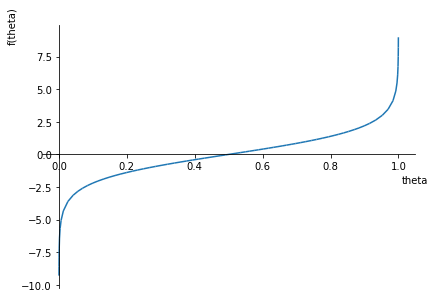

In [8]:
sympy.plotting.plot(sympy.log(theta/(1-theta)), (theta, 0, 1))

**Exercise 3.6**
MLE for Poisson distribution

$$
P(\mathbf{x}|\lambda) = \frac{\lambda^{\sum {x_i}} \exp(-\lambda N)}{\prod_i x_i!}
$$

Let $\sum x_i = a$.

$$
\begin{align}
\frac{\mathrm{d}}{\mathrm{d}\lambda} P(\mathbf{x}|\lambda) &= 0 \\
a \lambda^{a-1} \exp(-\lambda N) - N \lambda^a \exp(-\lambda N) &= 0 \\
a - N \lambda &= 0 \\
\lambda &= \frac{\sum x_i}{N}
\end{align}
$$

**Exercise 3.7** Bayesian analysis for Poisson

Conjugate prior is 
$$
p(\lambda) = \frac{b^{a-1}}{\Gamma(a)} \lambda^{a-1} \exp(-\lambda b)
$$

Poisson is Gamma distribution with $b=1$ and $a = k + 1$. So

$$
\begin{align}
\mathrm{Gamma}(\sum x_i+1, N)\mathrm{Gamma}(a,b) &= \frac{b^{a-1}}{\Gamma(a)\Gamma(k+1)} \lambda^{k+a-1} \exp[-\lambda(b+1)] \\
                                          &\propto \mathrm{Gamma}(\sum x_i+a, N+b)
\end{align}
$$

For $a=b=0$ we recover the maximum-likelihood estimate.

**Exercise 3.8** MLE for uniform distribution

Uniform distribution for interval $[-a, a]$,

$$
P(\mathbf{x}|a) = \frac{1}{2 a} \prod_i \chi_{x_i \in [-a,a]} = \frac{1}{2 a} \chi_{\min_{x_i}\ge -a} \chi_{\max_{x_i} \le a} = \frac{1}{2a} \theta(\min x_i + a) \theta(a - \max x_i)
$$

In [9]:
a = sympy.symbols("a")

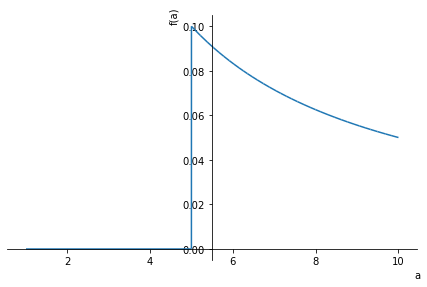

In [14]:
sympy.plotting.plot(1/(2*a) * sympy.Heaviside(-3+a) * sympy.Heaviside(a-5), (a,1, 10))

$\hat{a} = \max |x_i|$

**Exercise 3.9**

Pareto prior and uniform distribution. Joint distribution is

$$
\begin{align}
p(\mathcal{D}, \theta) &= \left(\frac{\mathbb{I}_{0 \le x_i \le \theta}}{\theta}\right)^N K b^K \theta^{-(K+1)} \mathbb{I}_{\theta \ge K} \\
                       &= \frac{K b^K}{\theta^{N + K + 1}} \mathbb{I}(\theta \ge \max \mathcal{D}) \mathbb{I}(\theta \ge b)
\end{align}
$$

Evidence: (TODO: add this to card!)

Let $m=\max(\mathcal{D})$.

$$
\begin{align}
p(\mathcal{D}) &= \int_{\max(m, b)}^\infty \frac{K b^K}{\theta^{N+k+1}}\ \mathrm{d}\theta \\
               &= K b^k \left.\frac{-1}{N+k} \frac{1}{\theta^{N+k}} \right|_{\max(m,b)}^\infty \\
               &= \frac{K b^K}{N+k} \frac{1}{\max(m,b)^{N+k}}
\end{align}
$$

Posterior distribution:

$$
\begin{align}
p(\theta|\mathcal{D}) &= \frac{p(\mathcal{D},\theta)}{p(\mathcal{D})} \\
                      &= \frac{(N+k) \max(m,b)^{N+k}}{\theta^{N+K+1}} \mathbb{I}(\theta \ge m) \mathbb{I}(\theta \ge b) \\
                      &= \frac{(N+k) \max(m,b)^{N+k}}{\theta^{N+K+1}} \mathbb{I}[\theta \ge \max(m, b)]
\end{align}
$$

So $p(\theta|\mathcal{D}) \sim \mathrm{Pareto}(N+k, \max(m,b))$.

**Exercise 3.10**
a. Uniformative prior $p(\theta|\mathcal{D}) = A/\theta$.
Joint probability:

$$
P(\theta, \mathcal{D}) = \frac{m}{\theta^{N+1}} \mathbb{I}(\theta \ge m)
$$

Evidence:

$$
\begin{align}
P(\mathcal{D}) &= \int_m^\infty \frac{m}{\theta^{N+1}}\ \mathrm{d}\theta \\
               &= \frac{m}{N m^N}
\end{align}
$$

So posterior is $$P(\theta|\mathcal{D}) = \frac{N m^N}{\theta^{N+1}} \mathbb{I}(\theta \ge m) \sim \mathrm{Pareto}(N, m)$$

Predictive number of next cab:

$$
\begin{align}
P(x|\mathcal{D}) &= \int_m^\infty P(x|\theta) P(\theta|\mathcal{D})\ \mathrm{d}\theta \\
                 &= N m^N \int_m^\infty \theta^{-(N+2)}\ \mathrm{d}\theta \\
                 &= N m^N \left. -\frac{1}{N+1} \theta^{-(N+1)}\right|_m^\infty \\
                 &= \frac{N m^N}{N+1} \frac{1}{m^{N+1}} \\
                 &= \frac{N}{m(N+1)}
\end{align}
$$

**Exercise 3.13**
Posterior predictive distribution for a batch of data with the dirichlet-multinomial model
In Equation 3.51, we gave the the posterior predictive distribution for a single multinomial trial using a
dirichlet prior. Now consider predicting a batch of new data, $\tilde{\mathcal{D}} = (X_1,\ldots, X_s)$, consisting of $s$ single
multinomial trials (think of predicting the next $m$ words in a sentence, assuming they are drawn iid).
Derive an expression for $p(\tilde{\mathcal{D}}|\mathcal{D},\alpha)$.

Multinomial distribution. State space for individual sample point is $\{1, \ldots, m\}$, each with a probability $\theta_1, \ldots, \theta_m$.

$$
p(\mathbf{x}|\mathbf{\theta}) = {N \choose k_1 \cdots k_m} \theta_1^{k_1} \cdots \theta_m^{k_m}
$$

Prior distribution is Dirichlet, which is the continuous extension of the multinomial distribution:

$$
p(\mathbf{\theta}|\mathbf{\alpha}) = \frac{\Gamma(\alpha_1 + \cdots + \alpha_m)}{\Gamma(\alpha_1)\cdots\Gamma(\alpha_m)} \theta_1^{\alpha_1-1} \cdots \theta_m^{\alpha_m-1}
$$

Posterior given the data is also Dirichlet,

$$
p(\boldsymbol{\theta}|\mathcal{D}) \sim \mathrm{Dirichlet}(\alpha_1+k_1, \ldots, \alpha_m+k_m)
$$

Posterior-predictive is then
$$
\begin{align}
p(\tilde{D}'|\mathcal{D}, \boldsymbol{\alpha}) &= \int p(\tilde{D}'|\boldsymbol{\theta}) p(\boldsymbol{\theta}|\boldsymbol{\alpha})\ \mathrm{d}\boldsymbol{\theta} \\
&= {N' \choose k_1' \cdots k_m'} \frac{\Gamma(\alpha_1 + k_1 + \cdots + \alpha_m + k_m)}{\Gamma(\alpha_1+k_1)\cdots\Gamma(\alpha_m+k_m)} \int \theta_1^{\alpha_1 + k_1 + k_1'  - 1}\ \mathrm{d}\theta_1 \cdots \int \theta_m^{\alpha_m + k_m+k_m'- 1}\ \mathrm{d}\theta_m \\
&= {N' \choose k_1' \cdots k_m'} \frac{\Gamma(\alpha_1 + k_1 + \cdots + \alpha_m + k_m)}{\Gamma(\alpha_1+k_1)\cdots\Gamma(\alpha_m+k_m)} \frac{\Gamma(\alpha_1 + k_1 + k_1') \cdots \Gamma(\alpha_m + k_m + k_m')}{\Gamma(\alpha_1 + k_1 + k_1' + \cdots \alpha_m + k_m + k_m')} \\
&= \frac{\Gamma(k_1'+\cdots+k_m'+1)}{\Gamma(k_1'+1)\cdots\Gamma(k_m'+1)} \frac{\Gamma(\alpha_1 + k_1 + \cdots + \alpha_m + k_m)}{\Gamma(\alpha_1+k_1)\cdots\Gamma(\alpha_m+k_m)} \frac{\Gamma(\alpha_1 + k_1 + k_1') \cdots \Gamma(\alpha_m + k_m + k_m')}{\Gamma(\alpha_1 + k_1 + k_1' + \cdots \alpha_m + k_m + k_m')}
\end{align}
$$

where the second equality comes from the fact that the integral over the domain of the Dirichlet distribution is 1.

**Exercise 3.14**

a) $m=27$, $\sum k_i = 2000$, $k_e=260$. $\alpha_k=10$, $\sum \alpha_i = 270$

$$
\begin{align}
P(x_{2001}=a|\mathcal{D}, \boldsymbol{\alpha}) &= \frac{\Gamma(2)}{\Gamma(2)} \frac{\Gamma(\sum \alpha_i + \sum k_i)}{\Gamma(10+260) \Gamma(\alpha_1 + k_1) \cdots \Gamma(\alpha_m+k_m)} \frac{\Gamma(\alpha_1+k_1) \cdots \Gamma(10+260+1) \cdots \Gamma(\alpha_m+k_m)}{\Gamma(\sum \alpha_i + \sum k_i + 1)} \\
&= \frac{\Gamma(2270)}{\Gamma(10+260)}\frac{\Gamma(10+260+1)}{\Gamma(2271)} \\
&= \frac{(2270-1)!}{(10+260-1)!}\frac{(10+260)!}{(2270)!} \\
&= \frac{270}{2270} \\
&= 0.1189
\end{align}
$$

In [16]:
import numpy, numpy.random

In [18]:
alpha = numpy.ones(27)*10.

In [59]:
k = numpy.ones(27)*64

In [60]:
k[0]=260

In [61]:
k[1]=k[1]+(2000-numpy.sum(k))

In [71]:
nsamples = 10000

In [86]:
theta = numpy.random.dirichlet(alpha+k, 1)

In [87]:
rng = numpy.random.default_rng()

In [88]:
samples = rng.multinomial(1, theta[0], size=nsamples)

In [89]:
numpy.where(samples[:] == 1)

(array([   0,    1,    2, ..., 9997, 9998, 9999]),
 array([ 9, 25,  1, ..., 17, 10,  1]))

In [90]:
numpy.shape(numpy.where(numpy.where(samples == 1)[1] == 0))[1]

1027

In [94]:
c=0

for i in range(1000):
    theta = numpy.random.dirichlet(alpha+k, 1)
    samples = rng.multinomial(1, theta[0], size=nsamples)
    c += numpy.shape(numpy.where(numpy.where(samples == 1)[1] == 0))[1]

In [96]:
c/nsamples/1000

0.11901210000000001

**Exercise 3.16**
Write a program to solve for $(\alpha_1, \alpha_2)$ of a Beta distribution given that $E \theta = m$ and $p(l < \theta < u) = p_0$.

$$
\mathrm{Beta}(\theta|\alpha_1, \alpha_2) = \frac{\Gamma(\alpha_1 + \alpha_2)}{\Gamma(\alpha_1) \Gamma(\alpha_2)} \theta^{\alpha_1-1} (1-\theta)^{\alpha_2 - 1}
$$

$$
E \theta = \frac{\alpha_1}{\alpha_1 + \alpha_2}
$$

In [97]:
import sympy

In [100]:
x, a1, a2, p0, p1 = sympy.symbols("x alpha1 alpha2 p0 p1", Reals=True)

In [ ]:
sympy.integrate(x**(a1-1)*(1-x)**(a2-1), (x, p0, p1))

**Exercise 3.17** Marginal likelihood for beta-binomial under uniform prior
Suppose we toss a coin $N$ times and observe $N_1$ heads. Let $N_1 \sim \mathrm{Bin}(N_1, \theta)$ and $\theta \sim \mathrm{Beta}(1,1)$. Show that the marginal likelihood is $p(N_1|N) = 1/(N +1)$. Hint: $\Gamma(x + 1) = x!$ if $x$ is an integer.

Marginal likelihood

$$
\begin{align}
p(N_1|N) &= \int p(N_1|N,\theta) p(\theta)\ \mathrm{d}\theta\\
         &= {N \choose N_1} \int \theta^{N_1} (1-\theta)^{N-N_1} \frac{\Gamma(2)}{\Gamma(1)\Gamma(1)}\ \mathrm{d}\theta \\
         &= {N \choose N_1} \frac{\Gamma(2)}{\Gamma(1)\Gamma(1)} \int \theta^{N_1+1-1} (1-\theta)^{N+1-N_1-1}\ \mathrm{d}\theta \\
         &= {N \choose N_1} \frac{\Gamma(2)}{\Gamma(1)\Gamma(1)} \frac{\Gamma(N_1+1)\Gamma(N+1-N_1)}{\Gamma(N_1+1 + N + 1 - N_1)} \\
         &= \frac{\Gamma(N+1)}{\Gamma(N_1+1) \Gamma(N-N_1+1)} \frac{\Gamma(N_1+1)\Gamma(N+1-N_1)}{\Gamma(N + 2)} \\
         &= \frac{\Gamma(N+1)}{\Gamma(N+2)}
\end{align}
$$

**Exercise 3.18** Bayes factor for coin tossing
Suppose we toss a coin $N = 10$ times and observe $N_1 = 9$ heads. Let the null hypothesis be that the
coin is fair, and the alternative be that the coin can have any bias, so $p(\theta) = \mathrm{Unif} (0,1)$. Derive the
Bayes factor $BF_{1,0}$ in favor of the biased coin hypothesis. What if $N = 100$ and $N_1 = 90$? Hint: see
Exercise 3.17.

$$
\begin{align}
\mathrm{BF}_{0,1} &= \frac{P(\mathcal{D}|M_0)}{P(\mathcal{D}|M_1)} \\
                  &= \frac{\int P(N_1|N, \theta) \delta(\theta-1/2)\ \mathrm{d}\theta}{\int P(N_1|N, \theta) \mathrm{Uni}(0,1)\ \mathrm{d}\theta} \\
                  &= {N \choose N_1} \frac{1}{2}^N \frac{1}{N+1}
\end{align}
$$

In [3]:
import scipy.special

In [5]:
scipy.special.comb(10,9) * 0.5**10/11

0.0008877840909090909

In [6]:
scipy.special.comb(100,90) * 0.5**100/101

1.3520224146003067e-19

**Exercise 3.19**

a. $p(C=1)=p(C=2)=0.5$. Log posterior odds ratio

$$
\begin{align}
\log \frac{P(C=1|\mathbf{x}_i)}{P(C=2|\mathbf{x}_i)} &= \log \frac{P(\mathbf{x}_i|C=1) P(C=1)}{P(\mathbf{x}_i|C=2) P(C=2)} \\
    &= \log P(\mathbf{x}_i|C=1) - P(\mathbf{x}_i|C=2) \\
    &= \phi(\mathbf{x}_i)^T \left(\boldsymbol{\beta}_1 - \boldsymbol{\beta}_2\right)
\end{align}
$$

b. What is the condition that individual words to not change the odds ratio?

$$
\log \frac{\theta_{1,j}}{1-\theta_{1,j}} = \log \frac{\theta_{2,j}}{1-\theta_{2,j}}
$$

where $\theta_{c,j}$ is the probability that word $j$ appears in documents of class $c$.

c.

$$
\hat{\theta}_{cw} = \frac{1+\sum_i x_{iw}}{2 + n_c}
$$

If we plug that into the condition (b) we get

$$
\begin{align}
\log \frac{1+\sum_i x_{iw}}{2+n_c} \left(1-\frac{1+\sum_i x_{iw}}{2+n_c}\right)^{-1}
  &= \log \frac{1+\sum_i x_{iw}}{2+n_c} \left(\frac{2+n_c - 1+\sum_i x_{iw}}{2+n_c}\right)^{-1} \\
  &= \log \frac{1+\sum_i x_{iw}}{2+n_c} \frac{2+n_c}{1+n_c +\sum_i x_{iw}} \\
  &= \log \frac{1+\sum_i x_{iw}}{1+n_c +\sum_i x_{iw}} \\
  &= \log \left(1+\sum_i x_{iw}\right) - \log \left(1+n_c +\sum_i x_{iw}\right) \\
  &= \log \left(1+n_c \right) - \log \left(1+n_c + n_c\right) \\
  &= \log \left(1+n_c \right) - \log \left(1+2 n_c\right) \\
\end{align}
$$

where the second to last equality comes from the fact that the word occurs in all documents, regardless of the class. So the answer is no, the word does not get disregarded.

**3.20**

a. $D$-variate Bernoulli:

$$
p(x_1, \ldots, x_d) = \theta_{1\cdots}^{x_1 \cdots} \theta_{0\cdots}^{(1-x_1) \cdots} \cdots \theta_{\cdots 1\cdots}^{\cdots x_i \cdots} \theta_{\cdots 0 \cdots}^{\cdots (1-x_i) \cdots} 
$$

This has $2^d - 1$ parameters, which means that the total number of parameters is $C (2^d-1)$.

b. + c. I would assume for low $N$ it is better to use the naive model since otherwise we have more parameters than samples. For large $N$, the full model seems to be better unless we know a priori that the probabilities are independent.


d. We assume that we have the feature vector $\mathbf{x}_i$ for each document already, i.e. we don't need to go through the words of the individual document (otherwise just multiply all costs by $\sum D_i$ where $D_i$ is the number of words in each document).

Then for naive Bayes MLE we have $\mathcal{O}(N D)$. 